# **EYE- DISEASE-CLASSIFICATION & DETECTION**  

## **Importing Modules for ML & DataFrames**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
import os
from tqdm import tqdm

##**Define Datasets**

In [4]:
glaucoma = Path('/content/drive/MyDrive/datasets/dataset/glaucoma')
cataract = Path('/content/drive/MyDrive/datasets/dataset/cataract')
normal = Path('/content/drive/MyDrive/datasets/dataset/normal')
diabetic_retinopathy = Path('/content/drive/MyDrive/datasets/dataset/diabetic_retinopathy')

##**List of disease categories**

In [5]:
disease_type = [glaucoma, cataract, normal, diabetic_retinopathy]
disease_labels = ["Glaucoma", "Cataract", "Normal", "Diabetic Retinopathy"]

## **Create a DataFrame**

In [6]:
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


##**Read images and create DataFrame**

In [7]:
for types in disease_type:
    for imagepath in tqdm(list(types.iterdir()), desc=str(types)):
        df = pd.concat([df, pd.DataFrame({'image': [str(imagepath)], 'disease_type': [disease_type.index(types)]})], ignore_index=True)


/content/drive/MyDrive/datasets/dataset/normal: 100%|██████████| 1074/1074 [00:00<00:00, 2195.75it/s]
/content/drive/MyDrive/datasets/dataset/diabetic_retinopathy: 100%|██████████| 1098/1098 [00:00<00:00, 2159.21it/s]


In [8]:
df

,image,disease_type
0,/content/drive/MyDrive/datasets/dataset/glauco...,0
1,/content/drive/MyDrive/datasets/dataset/glauco...,0
2,/content/drive/MyDrive/datasets/dataset/glauco...,0
3,/content/drive/MyDrive/datasets/dataset/glauco...,0
4,/content/drive/MyDrive/datasets/dataset/glauco...,0
...,...,...
4222,/content/drive/MyDrive/datasets/dataset/diabet...,3
4223,/content/drive/MyDrive/datasets/dataset/diabet...,3
4224,/content/drive/MyDrive/datasets/dataset/diabet...,3
4225,/content/drive/MyDrive/datasets/dataset/diabet...,3


## **Shuffle datasets**

In [9]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,image,disease_type
0,/content/drive/MyDrive/datasets/dataset/catara...,1
1,/content/drive/MyDrive/datasets/dataset/catara...,1
2,/content/drive/MyDrive/datasets/dataset/normal...,2
3,/content/drive/MyDrive/datasets/dataset/glauco...,0
4,/content/drive/MyDrive/datasets/dataset/catara...,1
...,...,...
4222,/content/drive/MyDrive/datasets/dataset/diabet...,3
4223,/content/drive/MyDrive/datasets/dataset/glauco...,0
4224,/content/drive/MyDrive/datasets/dataset/normal...,2
4225,/content/drive/MyDrive/datasets/dataset/diabet...,3


## **Display first few rows**

In [10]:
print(df.head(10))

                                               image  disease_type
0  /content/drive/MyDrive/datasets/dataset/catara...             1
1  /content/drive/MyDrive/datasets/dataset/catara...             1
2  /content/drive/MyDrive/datasets/dataset/normal...             2
3  /content/drive/MyDrive/datasets/dataset/glauco...             0
4  /content/drive/MyDrive/datasets/dataset/catara...             1
5  /content/drive/MyDrive/datasets/dataset/glauco...             0
6  /content/drive/MyDrive/datasets/dataset/diabet...             3
7  /content/drive/MyDrive/datasets/dataset/catara...             1
8  /content/drive/MyDrive/datasets/dataset/glauco...             0
9  /content/drive/MyDrive/datasets/dataset/catara...             1


## **Check for missing values**

In [11]:
print(df.isnull().sum())

image           0
disease_type    0
dtype: int64


## **check the count of the target label**

In [12]:
df.disease_type.value_counts()

,count
disease_type,
3,1098
2,1074
1,1038
0,1017


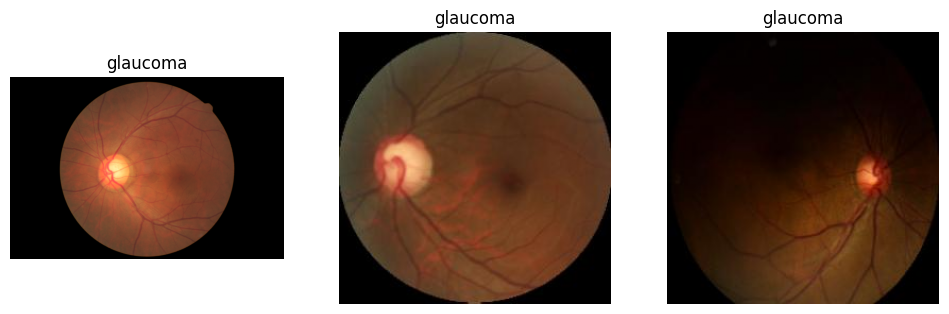

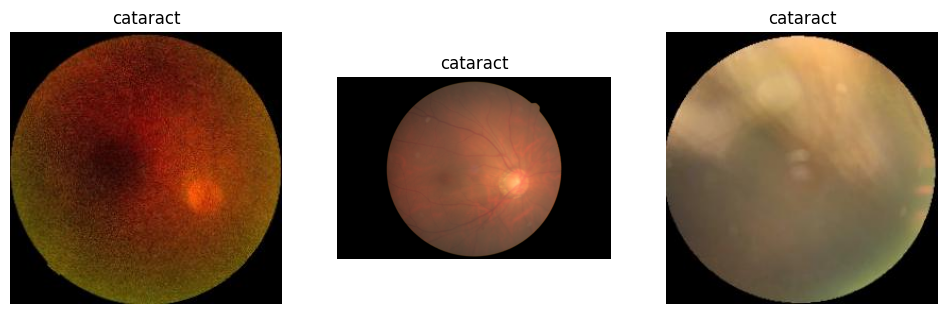

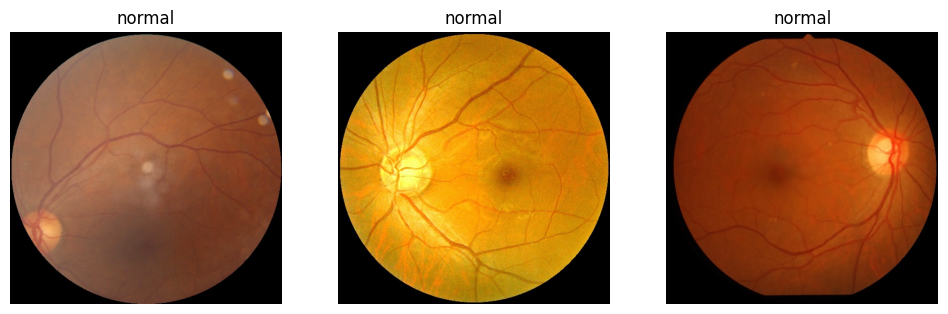

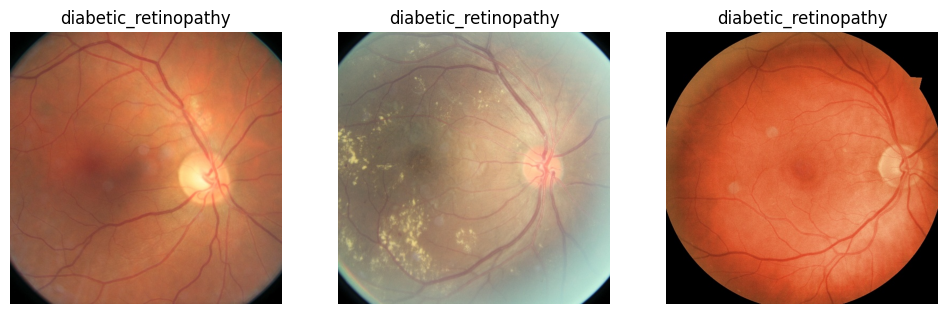

In [13]:
# define function to plot sample images
def plot_image(n, num_samples=3):
    disease_labels = ['glaucoma', 'cataract', 'normal', 'diabetic_retinopathy']
    images = df[df['disease_type'] == n].sample(num_samples)['image']

    plt.figure(figsize=(12, 12))

    for i, path in enumerate(images, 1):
        img = (plt.imread(path) - plt.imread(path).min()) / plt.imread(path).max()
        plt.subplot(3, 3, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(disease_labels[n])

    plt.show()



plot_image(0)
plot_image(1)
plot_image(2)
plot_image(3)

In [14]:
# map the labels to the disease type
df['disease_type'] = df['disease_type'].map({0:'glaucoma',1:'cataract',2:'normal',3:'diabetic_retinopathy'})

In [15]:
# randomising the dataset
df1 = df.sample(frac=1).reset_index(drop=True)

## **Visualizing Class Distribution**

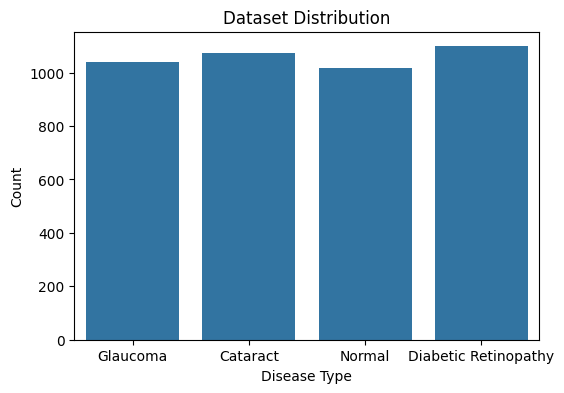

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["disease_type"])
plt.xticks(ticks=[0, 1, 2, 3], labels=disease_labels)
plt.xlabel("Disease Type")
plt.ylabel("Count")
plt.title("Dataset Distribution")
plt.show()

##**import necessary libraries for the model**

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
# augumentation of images
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)

In [19]:
# create the train data
train_data = datagen.flow_from_dataframe(dataframe=df,
                                          x_col ='image',
                                          y_col = 'disease_type',
                                          target_size=(224,224),
                                          class_mode = 'categorical',
                                          batch_size = 32,
                                          shuffle = True,
                                          subset = 'training')

Found 3382 validated image filenames belonging to 4 classes.


#### create the validation data

In [20]:
valid_data = datagen.flow_from_dataframe(dataframe=df1,
                                          x_col ='image',
                                          y_col = 'disease_type',
                                          target_size=(224,224),
                                          class_mode = 'categorical',
                                          batch_size = 32,
                                          shuffle = False,
                                          subset = 'validation')

labels=[key for key in train_data.class_indices]
num_classes = len(disease_type)

model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(224,224, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])

Found 845 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,446,756 (24.59 MB)

 Trainable params: 6,446,756 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

## **fitting the model**

In [22]:
his = model.fit(
  train_data,
    validation_data=valid_data,
  epochs=5
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 1017s 10s/step - accuracy: 0.5343 - loss: 1.0685 - val_accuracy: 0.7325 - val_loss: 0.6340
Epoch 2/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.7578 - loss: 0.5801 - val_accuracy: 0.7882 - val_loss: 0.4763
Epoch 3/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.7942 - loss: 0.5032 - val_accuracy: 0.8391 - val_loss: 0.3897
Epoch 4/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.8288 - loss: 0.4296 - val_accuracy: 0.8746 - val_loss: 0.3100
Epoch 5/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.8669 - loss: 0.3198 - val_accuracy: 0.8781 - val_loss: 0.3292


## **create a plot of accuracy and val_acuracy for each epoch**

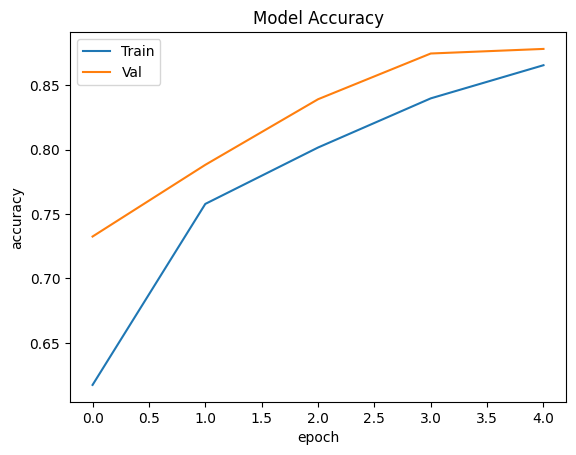

In [23]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'])
plt.show()

## **create a plot of loss and val_loss for each epoch**

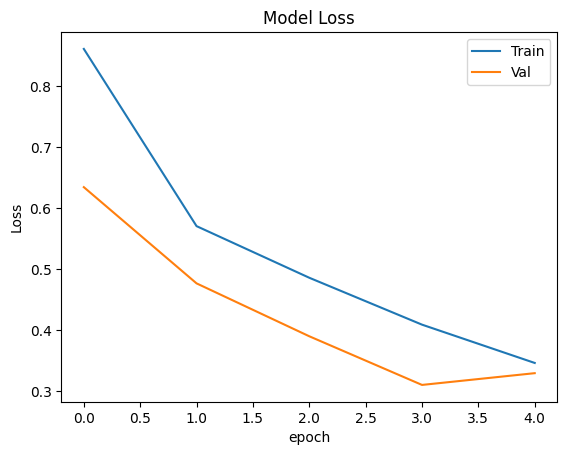

In [27]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'])
plt.show()


## **Generate classification report of the model**

In [33]:
print(classification_report(y_test,y_pred,target_names = labels))

                      precision    recall  f1-score   support

            cataract       0.79      0.87      0.83       203
diabetic_retinopathy       1.00      1.00      1.00       223
            glaucoma       0.88      0.72      0.79       205
              normal       0.84      0.91      0.87       214

            accuracy                           0.88       845
           macro avg       0.88      0.88      0.87       845
        weighted avg       0.88      0.88      0.88       845

